##### <img src="../SDSS-Logo.png" style="display:inline; width:500px" />


## Learning Objectives
1. Learn about the scikit-learn Python library



### scikit-learn is a library for Python that provides a large number of functions for machine learning.
### scikit-learn is built on top of Numpy and takes advantage of Numpy's fast math capabilities.

### scikit-learn provides solutions in a number of machine learning areas


|Area|
|----------|
|Classification|
|Regression|
|Clustering|
|Dimensioality Reduction|
|Model selection|
|Pre-processing|



### scikit-learn example
### Use a random forest model on the Wisconsin breast cancer dataset

* This lesson draws heavily from [Sebastian Raschka's book](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html)
* and [James, Witten, Hastie and Tibshirani's book](https://www.statlearning.com/)
* The [API](https://scikit-learn.org/stable/modules/classes.html#api-ref) for sklearn is also very useful to see the list of available functions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load the Wisconsin breast cancer dataset.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
bc_data = load_breast_cancer()
type(bc_data)

sklearn.utils._bunch.Bunch

## Look into the `bunch` data to see what is there.
* sklearn info about the [bunch model](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html).

In [10]:
dir(bc_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
bc_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
list(bc_data.target_names)

[np.str_('malignant'), np.str_('benign')]

### Divide the dataset into a train and test split with 20% test data.
### Make sure to maintain positive/negative ratio in train and test sets.

In [31]:
X = bc_data.data
y = bc_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Use the sklearn `MinMaxScaler` to scale the features to be between 0 and 1.

In [33]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(X_train)
X_train_std_mm = mm.transform(X_train)
# Scale thet test data independently of the training data scaling
X_test_std_mm = MinMaxScaler().fit(X_test).transform(X_test)
X_test_std_mm2 = MinMaxScaler().fit_transform(X_test)


print(f"X_test_std_mm: \n{X_test_std_mm} \n\nX_test_std_mm2:\n{X_test_std_mm2}")

X_test_std_mm: 
[[0.32664665 0.39411248 0.30898225 ... 0.50352941 0.45625889 0.52910389]
 [0.48827701 0.39806678 0.48800285 ... 0.67921569 0.42816501 0.78271213]
 [0.19376477 0.8602812  0.18535367 ... 0.26803922 0.46870555 0.24187153]
 ...
 [0.54896825 0.543058   0.51297832 ... 0.77803922 0.58677098 0.29738303]
 [0.62052003 0.3897188  0.575417   ... 0.61607843 0.58321479 0.19714512]
 [0.24870632 0.31370826 0.22388725 ... 0.10917647 0.12482219 0.07597145]] 

X_test_std_mm2:
[[0.32664665 0.39411248 0.30898225 ... 0.50352941 0.45625889 0.52910389]
 [0.48827701 0.39806678 0.48800285 ... 0.67921569 0.42816501 0.78271213]
 [0.19376477 0.8602812  0.18535367 ... 0.26803922 0.46870555 0.24187153]
 ...
 [0.54896825 0.543058   0.51297832 ... 0.77803922 0.58677098 0.29738303]
 [0.62052003 0.3897188  0.575417   ... 0.61607843 0.58321479 0.19714512]
 [0.24870632 0.31370826 0.22388725 ... 0.10917647 0.12482219 0.07597145]]


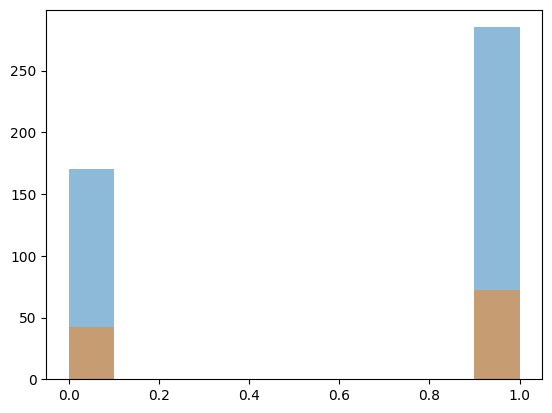

In [34]:
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

### Create a Random Forest Classifier using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier) to classify the dataset

In [21]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = bc_data.feature_names

forest = RandomForestClassifier(n_estimators=100,
                                criterion="entropy",
                                random_state=1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


In [23]:
print(y_train_pred, y_test_pred)

[0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 1 1 1 0] [1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1
 

### Compute the confusion matrix for this data.
* [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(confmat)

[[40  2]
 [ 2 70]]


In [30]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

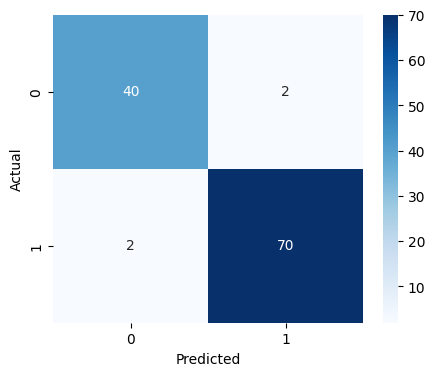

In [26]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()